# ISAT225 Final Project 
## How to Analyze and Visualize Covid-19 Data

###### Covid-19 (AKA SARS CoV-2) is a virus that began in December 2019 originating in the Wuhan region of China. It is one of the seven coronaviruses that can infect humans, the name coming from the protein spikes covering them that looks like a crown, or corona in latin. Out of these seven, four of them infect the nose and throat causing flu-like symptoms, and two infect the lungs causing more severe illness. The newest one, however, has features of both, spreading easily and impacting the lungs.

Coronaviruses are RNA viruses, meaning they are usually smaller than DNA viruses, therefore having fewwer genes and spread and mutate quickly. However, coronaviruses are some of the largest, meaning more genes that can and will have mutations that can lead to newer strains and variations. Their lethality comes from an unique feature, an enzyme that checks for errors and mistakes, making them more stable than RNA viruses. This is a promising thing though, the slower mutations will allow any vaccines that are developed to work for longer. Developed vacccines are tailored specifically for a certain virus, but once they have mutated to a certain point, they will no longer be recognizable to our immune systems, which is why the flu shot changes every year.

In [236]:
import pandas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [264]:
df = pandas.read_csv('s3://isat252-liu/csv')     #Reading in the file
df[:5]    #Running it

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,09/06/2020,9,6,2020,575,12,Afghanistan,AF,AFG,37172386.0,Asia
1,08/06/2020,8,6,2020,791,30,Afghanistan,AF,AFG,37172386.0,Asia
2,07/06/2020,7,6,2020,582,18,Afghanistan,AF,AFG,37172386.0,Asia
3,06/06/2020,6,6,2020,915,9,Afghanistan,AF,AFG,37172386.0,Asia
4,05/06/2020,5,6,2020,787,6,Afghanistan,AF,AFG,37172386.0,Asia


## Looking at the number of cases and deaths by continent

In [90]:
cases_by_continent = df.groupby('continentExp').sum()['cases']    #The total number of cases per continent

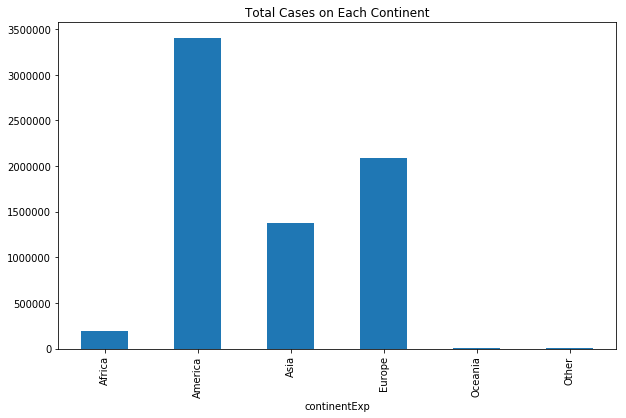

In [257]:
cases_by_continent.plot.bar(title = "Total Cases on Each Continent")

In [91]:
deaths_by_continent = df.groupby('continentExp').sum()['deaths']      #The total number of deaths per continent

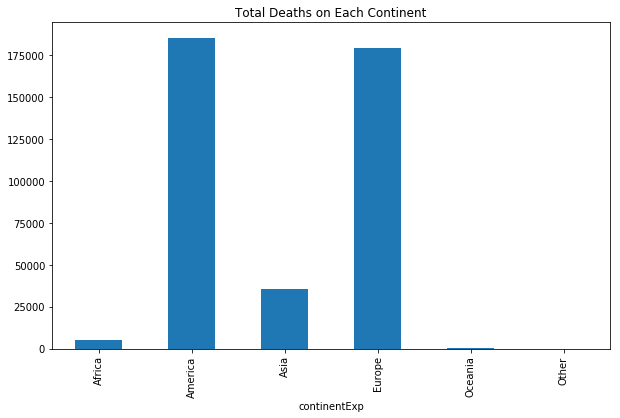

In [258]:
deaths_by_continent.plot.bar(title = "Total Deaths on Each Continent")

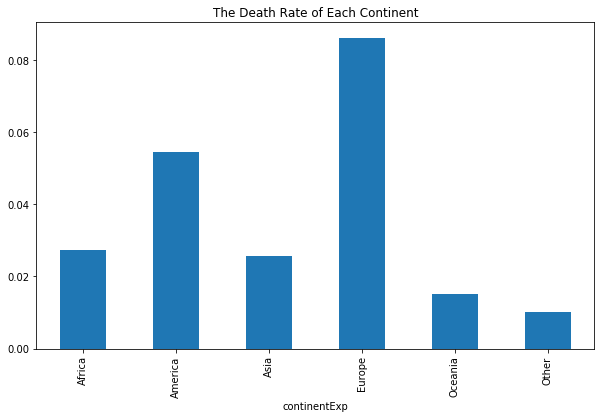

In [259]:
death_percentage_of_cases_by_continent = deaths_by_continent/cases_by_continent   #Percentage of deaths based on cases
death_percentage_of_cases_by_continent.plot.bar(title = "The Death Rate of Each Continent")

#### It looks like Europe and America have the largest percentage of deaths from Covid-19 while Oceania and Asia have far fewer. This could be due to a number of factors including response rate, effectivity of measures, population, health standards and international travel.

###### *America consists of both the North and South continents

In [118]:
total_cases_in_america.sum()    #Total cases in Americas

3403398

In [117]:
df.loc[df['countriesAndTerritories'] == 'United_States_of_America'].sum()['cases']    #Total cases in USA

1961185

&nbsp;
&nbsp;
&nbsp;

## Looking at the countries with the highest death rates as well as the lowest.

In [24]:
death_percentages = df.groupby('countriesAndTerritories').sum()['deaths']/df.groupby('countriesAndTerritories').sum()['cases']

In [253]:
# death_percentages.sort_values

In [123]:
top_twenty_death_percentages = death_percentages.nlargest(20)     #Countries with the worst death rate

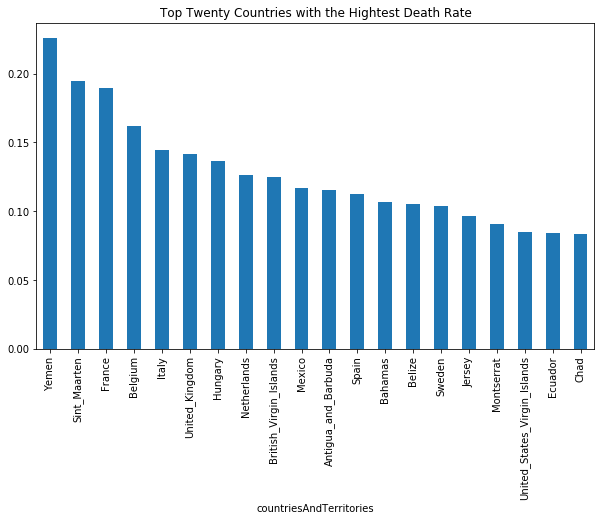

In [284]:
top_twenty_death_percentages.plot.bar(title = 'Top Twenty Countries with the Hightest Death Rate')

#### This seems to be fairly in line with the charts of the death rates and cases the previous part. Many of these countries are from Europe, and most of the rest are smaller islands and countries in the Americas.

In [286]:
countries_population_estimates = df.groupby('countriesAndTerritories').mean()['popData2018']
countries_no_death = death_percentages.loc[death_percentages == 0]
no_death = pandas.concat([countries_population_estimates, countries_no_death], axis = 1, keys = ['population', 'death_rate'])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


In [287]:
no_covid_fatalities

,population,death_rate
Anguilla,NaN,0.0
Bhutan,754394.0,0.0
"Bonaire, Saint Eustatius and Saba",NaN,0.0
Cambodia,16249798.0,0.0
Dominica,71625.0,0.0
Eritrea,NaN,0.0
Falkland_Islands_(Malvinas),NaN,0.0
Faroe_Islands,48497.0,0.0
Fiji,883483.0,0.0
French_Polynesia,277679.0,0.0


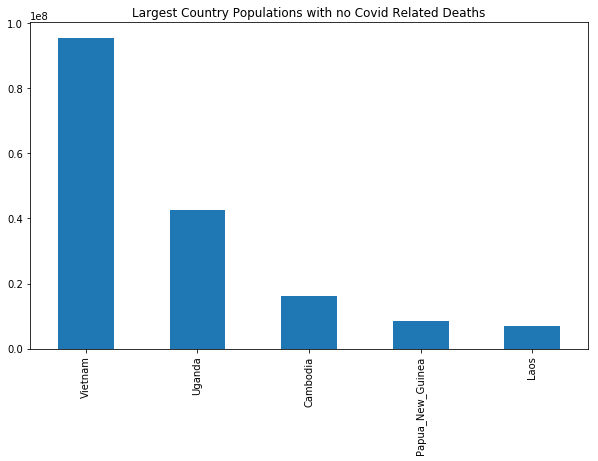

In [299]:
no_covid_fatalities = no_death.loc[no_death['death_rate'] == 0]
largest_countries_with_no_deaths = no_covid_fatalities['population'].nlargest(5)
largest_countries_with_no_deaths.plot.bar(title = "Largest Country Populations with no Covid Related Deaths")

#### Again, the data is fairly consistent from the continents graph. The lowest death rates (no deaths recoreded) were from countries in Oceania and Asia. Many of these are smaller islands likely to have less cases, but some like Cambodia and Vietnam have sizable cities. Vietnam was a country that was Incredibly proactive and declared a pandemic after only 6 cases were found in their country. They then shut down there borders in March and have since reopened with no new reported cases and zero recoreded deaths. This is an incredible story for a country that shares a border with China and has almost 100 million people.

&nbsp;
&nbsp;
&nbsp;

## Comparing death rates of Europe and America
### The two highest death rates

In [107]:
cases_in_america = df.loc[df['continentExp'] == 'America' ]
total_cases_in_america = cases_in_america.groupby('countriesAndTerritories').sum()['cases']
top_cases_in_america = total_cases_in_america.nlargest(7)

In [159]:
deaths_in_america = df.loc[df['continentExp'] == 'America' ]
sum_deaths_in_america = deaths_in_america.groupby('countriesAndTerritories').sum()['deaths']
top_deaths_in_america = sum_deaths_in_america.nlargest(7)

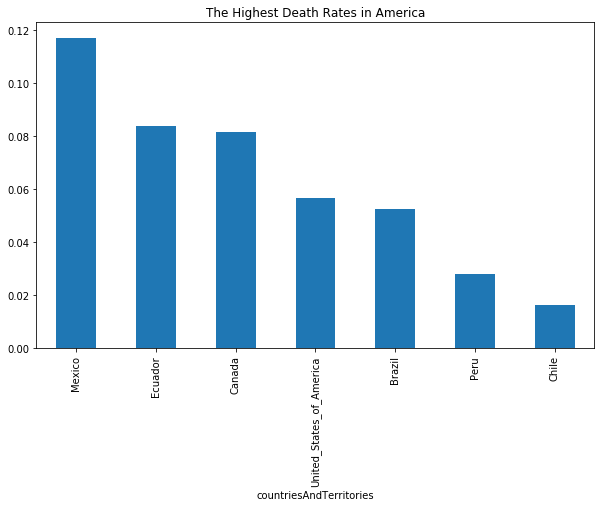

In [261]:
death_percentages_in_america = top_deaths_in_america/top_cases_in_america
highest_death_rate_in_america = death_percentages_in_america.nlargest(7)
highest_death_rate_in_america.plot.bar(title = "The Highest Death Rates in America")

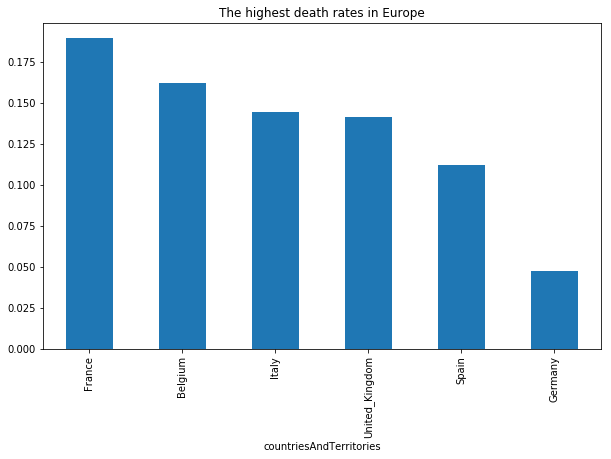

In [308]:
cases_in_europe = df.loc[df['continentExp'] == 'Europe' ]
total_cases_in_europe = cases_in_europe.groupby('countriesAndTerritories').sum()['cases']
top_cases_in_europe = total_cases_in_europe.nlargest(7)
deaths_in_europe = df.loc[df['continentExp'] == 'Europe' ]
sum_deaths_in_europe = deaths_in_europe.groupby('countriesAndTerritories').sum()['deaths']
top_deaths_in_europe = sum_deaths_in_europe.nlargest(7)
death_percentages_in_europe = top_deaths_in_europe/top_cases_in_europe
highest_death_rate_in_europe = death_percentages_in_europe.nlargest(7)
highest_death_rate_in_europe.plot.bar(title = 'The highest death rates in Europe')

In [311]:
comparing_europe_and_america = pandas.concat([highest_death_rate_in_america, highest_death_rate_in_europe], axis = 1, keys = ['America', 'Europe'])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


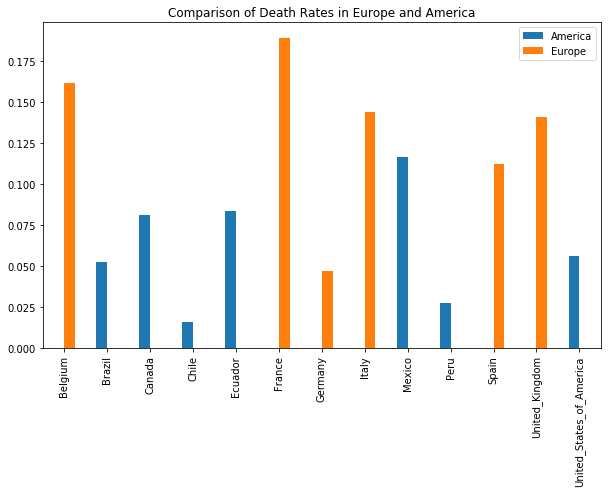

In [312]:
comparing_europe_and_america.plot.bar(title = "Comparison of Death Rates in Europe and America")    #A bar plot showing the death rates of America and Europe

In [317]:
comparing_cases_in_europe_and_america = pandas.concat([top_cases_in_america, top_cases_in_europe], axis = 1, keys = ['America', 'Europe'])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


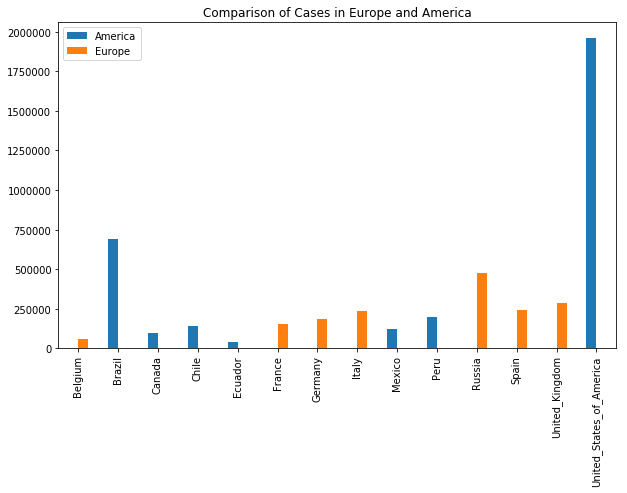

In [318]:
comparing_cases_in_europe_and_america.plot.bar(title = "Comparison of Cases in Europe and America")

###### Europe has the highest deaths rates in the globally, however, the USA has the highest number of cases, clearly surpassing any other countries. It has twice as many cases as the next country and almost one-third of the total reported cases worldwide.

&nbsp;
&nbsp;
&nbsp;

## An additional look at the cases and deaths in America

In [209]:
deaths_and_cases_in_america = pandas.concat([total_cases_in_america, sum_deaths_in_america] , axis = 1, keys = ['cases', 'deaths'])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [302]:
deaths_vs_cases_in_america = deaths_and_cases_in_america.loc[deaths_and_cases_in_america['deaths'] > -1]

In [252]:
# print(plt.rcParams.get('figure.figsize'))

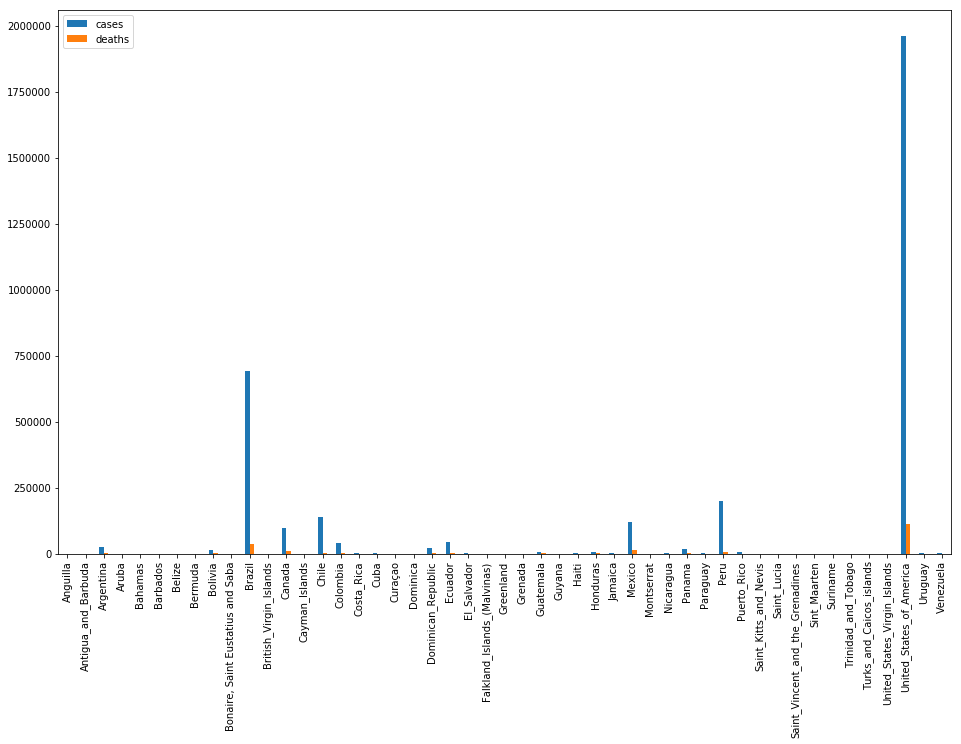

In [320]:
# fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 10
deaths_vs_cases_in_america.plot.bar(y = ['cases', 'deaths'])

#### Some of the limitations of analysing the data is from the present time view as the cases and deaths continue to rise. I, personally did not have the skills to view the data day to day, to see the increasing and decreasing of cases from the beginning of the virus to the present, as some countries such as Italy are nearing herd immunity. Herd immunity is when a population is completely or mostly immune to a virus and therefore leaves no hosts for it to be passes on. Even if it's not every single person, when enough of the population is immune, the virus is halted and not spread enough that it would no longer be an epidemic. A limitation for this project would be showing the populations nearing that status, such as Italy, which saw large numbers earlier but now has decreasing cases even as it reopens. Another limit was that this doesn't show how many people were tested, if they were negative or tested for antibodies showing they had had the virus and developed antibodies to it.
###### *A side note would be that I personally know people who have had the symptoms for Covid-19, but did not go to get tested, that would skew the data a bit. And another thing would be that China does not count the people who were asymptomatic, meaning those who did not show any symptoms, changing the number of cases they've claimed to have had.

### The coronavirus has wrought havoc in the past couple of month and it will be a while before we see all of the effects. Given the new breakthroughs human have made in technology and exploration, to some this suggest only a matter of time before a new epidemic breaks out. However, looking at the both the best and worst death rates, it is clear that a pandemic does not have to be devastating.